<h1 p style="color:red"><center>Week 3 Toronto Project</center></h1>

## Section 1: Toronto Neighborhood Data

In [116]:
#!pip uninstall sklearn
#!pip uninstall scikit-learn
#!pip install -U numpy
!pip install numpy
#!pip install -U pandas
!pip install pandas
#!pip install -U scipy
!pip install scipy
#!pip install -U scikit-learn
!pip install scikit-learn
#!pip install sklearn
#!pip install -U imbalanced-learn
!pip install imbalanced-learn
#!pip install -U wget
!pip install wget
#!pip install -U geopy
!pip install geopy
!pip install folium==0.5.0
# !pip install geocoder
# !conda install -c conda-forge geocoder --yes
print('INSTALLS DONE')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [117]:
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import wget
# import geocoder
from geopy.geocoders import Nominatim
import folium
print('LIBRARIES IMPORTED')

LIBRARIES IMPORTED


In [118]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
tables = soup.find_all('table')
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>List of postal codes of Canada: M - Wikipedia</title>


In [119]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
df_toronto=pd.DataFrame(table_contents)
df_toronto['Borough']=df_toronto['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df_toronto.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


## Section 2: Toronto Geo Data + Merge

In [120]:
!wget -O Geospatial_Coordinates.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv
geodata = "Geospatial_Coordinates.csv"
with open(geodata, "r") as file1:
    FileContent=file1.read()

df_geo = pd.read_csv('Geospatial_Coordinates.csv')
df_geo.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
df_geo['PostalCode'] = df_geo['PostalCode'].astype(str)
df_geo['PostalCode'] = df_geo['PostalCode'].str.replace('\n','')
df_geo.head()

--2021-04-15 01:53:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2788 (2.7K) [text/csv]
Saving to: ‘Geospatial_Coordinates.csv’

Geospatial_Coordina 100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-04-15 01:53:54 (57.7 MB/s) - ‘Geospatial_Coordinates.csv’ saved [2788/2788]



,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [123]:
df_toronto_data = df_toronto.merge(df_geo, on = 'PostalCode')
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_toronto_data['Borough'].unique()),
        df_toronto_data.shape[0]))

The dataframe has 15 boroughs and 103 neighborhoods.


In [124]:
df_toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


## Section 3: Clustering and Maps

I decided not to limit the boroughs, I used the entire set instead. Started with an overview map of where the postal code derived neighborhoods fit on the overall map...

### Toronto Neighborhoods Overview

In [125]:
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(df_toronto_data['Latitude'], df_toronto_data['Longitude'], df_toronto_data['Borough'], df_toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

In [167]:
# The code was removed by Watson Studio for sharing.

In [168]:
CLIENT_ID = my_id # your Foursquare ID
CLIENT_SECRET = my_secret # your Foursquare Secret
VERSION = '20210401' # Foursquare API version
LIMIT = 50 # A default Foursquare API limit value
print('FOURSQUARE API CREDENTIALS SET')

FOURSQUARE API CREDENTIALS SET


### Testing things out by focusing on one location...

In [169]:
df_toronto_data.loc[0, 'Neighborhood']

'Parkwoods'

In [171]:
neighborhood_latitude = df_toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto_data.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df_toronto_data.loc[0, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [172]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5DITIKJB0DXN5D02SRH5XC4EXDO4Z2FXOAJKOQ5CHZCP2BSK&client_secret=XENP21VW2CSAV3BGXGFMQNNMETLDTAG3YGUUXGQWATWRT5WU&v=20210401&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [173]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6077a11cf98e863be7a88691'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [174]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
print("FUNCTION CREATED")

FUNCTION CREATED


In [175]:
venues = results['response']['groups'][0]['items'] # assign relevant part of JSON to venues
nearby_venues = json_normalize(venues) # tranform venues into a dataframe
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng'] # filter columns
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) # filter the category for each row
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] # clean columns

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


### Running it for the whole group...

In [176]:
# creating the "getNearbyVenues" function:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( # API request URL
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items'] # GET request
        venues_list.append([(  # choose info to be returned for each venue
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
print("FUNCTION CREATED")

FUNCTION CREATED


In [177]:
# calling the "getNearbyVenues" function with reference to latitudes and longitudes in the df_toronto_data dataframe:
toronto_venues = getNearbyVenues(names=df_toronto_data['Neighborhood'],
                                   latitudes=df_toronto_data['Latitude'],
                                   longitudes=df_toronto_data['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [136]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 uniques categories.


In [137]:
# one hot encoding
# 'get_dummies' converts categorical variable into dummy/indicator variables.
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### code below is to move 'Neighborhood' from the middle of the columns to the first. The method used in the prior lab wasn't working, because 'Neighborhood' was sitting in it's alphbetical postion, not at the end. So the 'move the last column to the first' method used in the prior lab was grabbing 'Yoga Studio', not 'Neighborhood'.

In [138]:
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] # add neighborhood data back to empty 'Neighborhood' column in dataframe

# move re-inserted column back to first position
cols = toronto_onehot.columns.tolist() # define a list of column names
cols.insert(0, cols.pop(cols.index('Neighborhood'))) # move the column name to the beggining
toronto_onehot = toronto_onehot.reindex(columns= cols) #then use .reindex() function to reorder
toronto_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
toronto_onehot.shape

(2114, 274)

In [145]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0               Skating Rink  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4          Accessories Store  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.29
1   Coffee Shop  0.14
2           Pub  0.14
3  Skating Rink  0.14
4           Gym  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.08
1                Coffee Shop  0.08
2                Bridal Shop  0.04
3  Middle Eastern Restaurant  0.04
4              Shopping Mall  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1   Chinese Restaurant  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4          Men's Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Pizza Place  0.08
1      Sandwich Place  0.08
2  Italian 

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
print("FUNCTION CREATED")

FUNCTION CREATED


In [147]:
num_top_venues = 10

# adds 'st' to '1st' etc
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Lounge,Breakfast Spot,Latin American Restaurant,Accessories Store,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Pub,Skating Rink,Gym,Sandwich Place,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Bridal Shop,Middle Eastern Restaurant,Shopping Mall,Mobile Phone Shop,Sandwich Place,Fried Chicken Joint,Supermarket,Frozen Yogurt Shop
3,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater
4,"Bedford Park, Lawrence Manor East",Pizza Place,Sandwich Place,Italian Restaurant,Coffee Shop,Pet Store,Indian Restaurant,Sushi Restaurant,Juice Bar,Restaurant,Liquor Store


In [149]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
toronto_grouped_clustering.head()

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### To find a good number for K clusters I ran the "elbow graph" plot, however as you can see below, the result didn't show any really distinct "elbow" all the way out to K=25. It periodically flattens a bit but then resumes the same steady slope. I ended up using 8...

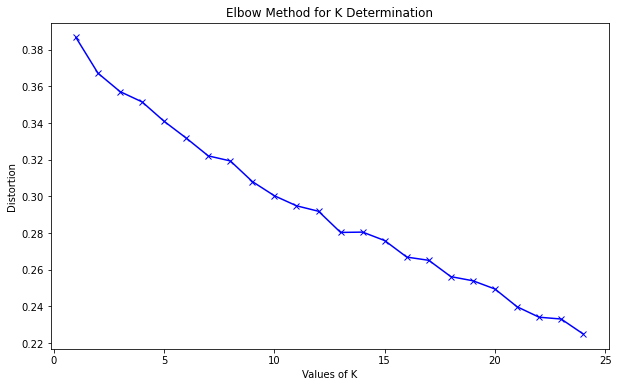

In [151]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    kmeanModel.fit(toronto_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / toronto_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / toronto_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method for K Determination')
plt.show()

In [152]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 7], dtype=int32)

In [153]:
neighborhoods_venues_sorted.insert(0, "Cluster_Labels", kmeans.labels_)
toronto_merged = df_toronto_data
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,7.0,Food & Drink Shop,Park,Metro Station,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Mexican Restaurant,Accessories Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Pizza Place,Coffee Shop,Portuguese Restaurant,Hockey Arena,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Pub,Café,Bakery,Breakfast Spot,Theater,Distribution Center,Dessert Shop,Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Accessories Store,Miscellaneous Shop,Carpet Store,Shoe Store,Gift Shop,Furniture / Home Store,Coffee Shop,Vietnamese Restaurant,Boutique
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Café,Beer Bar,Fried Chicken Joint,Smoothie Shop,Burrito Place,Mexican Restaurant,Sandwich Place


#### The merged data was creating a row with a NaN value for Cluster_Label, as there was one neighborhood with no venues. To keep subsequent code from breaking, I removed the NaN row:

In [154]:
toronto_merged.Cluster_Labels.unique()

array([ 7.,  0., nan,  5.,  3.,  6.,  1.,  2.,  4.])

In [155]:
toronto_merged.dropna(inplace=True)
toronto_merged.Cluster_Labels.unique()

array([7., 0., 5., 3., 6., 1., 2., 4.])

In [156]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Creating buckets for each of the clusters for the "most common" lists to follow:

In [157]:
required_column_indices = [6,7]
required_column = [list(toronto_merged.columns.values)[i] for i in required_column_indices]

cluster_0 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 0, toronto_merged.columns[0:15]]
cluster_1 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 1, toronto_merged.columns[0:15]]
cluster_2 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 2, toronto_merged.columns[0:15]]
cluster_3 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 3, toronto_merged.columns[0:15]]
cluster_4 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 4, toronto_merged.columns[0:15]]
cluster_5 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 5, toronto_merged.columns[0:15]]
cluster_6 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 6, toronto_merged.columns[0:15]]
cluster_7 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 7, toronto_merged.columns[0:15]]
print("DATAFRAMES CREATED")

DATAFRAMES CREATED


### Cluster 0 Most Common - Coffee Shops

In [158]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Coffee Shop             19
Pizza Place              9
Café                     5
Pharmacy                 4
Clothing Store           3
Fast Food Restaurant     3
Sandwich Place           3
Bank                     2
Grocery Store            2
Discount Store           2
Japanese Restaurant      2
Indian Restaurant        2
Skating Rink             2
Drugstore                1
Playground               1
Airport Terminal         1
Thai Restaurant          1
Motel                    1
Pool                     1
Turkish Restaurant       1
Garden                   1
Bakery                   1
Donut Shop               1
Mexican Restaurant       1
Baseball Field           1
Field                    1
Light Rail Station       1
Dessert Shop             1
Food Truck               1
Gift Shop                1
Pub                      1
Convenience Store        1
Massage Studio           1
Gym                      1
Greek Restaurant         1
College Stadium          1
Sushi Restaurant         1
B

### Cluster 1 Most Common - Jewelry Store

In [159]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Jewelry Store    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Accessories Store    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 2 Most Common - Playground/Park

In [160]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Playground    1
Park          1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Park          1
Playground    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 3 Most Common - Construction

In [161]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Park      1
Bar       1
Bakery    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Construction & Landscaping    3
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 4 Most Common - River

In [162]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

River    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Accessories Store    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 5 Most Common - Fast Food

In [163]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Mexican Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 6 Most Common - Playgrounds

In [164]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Playground    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Restaurant                   1
Middle Eastern Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Cluster 7 Most Common - Parks

In [165]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Park                 3
Food & Drink Shop    1
Airport              1
Gym                  1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Park                 2
Convenience Store    1
Bus Line             1
Business Service     1
Women's Store        1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
